In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings(action="ignore")

## 1. Load the dataset into python environment

In [3]:
dt=pd.read_csv("titanic_dataset.csv")

In [4]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make "PassengerId" as the index column

In [5]:
new_dt = dt.set_index("PassengerId")
new_dt

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [6]:
new_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
new_dt.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
new_dt.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
new_dt.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

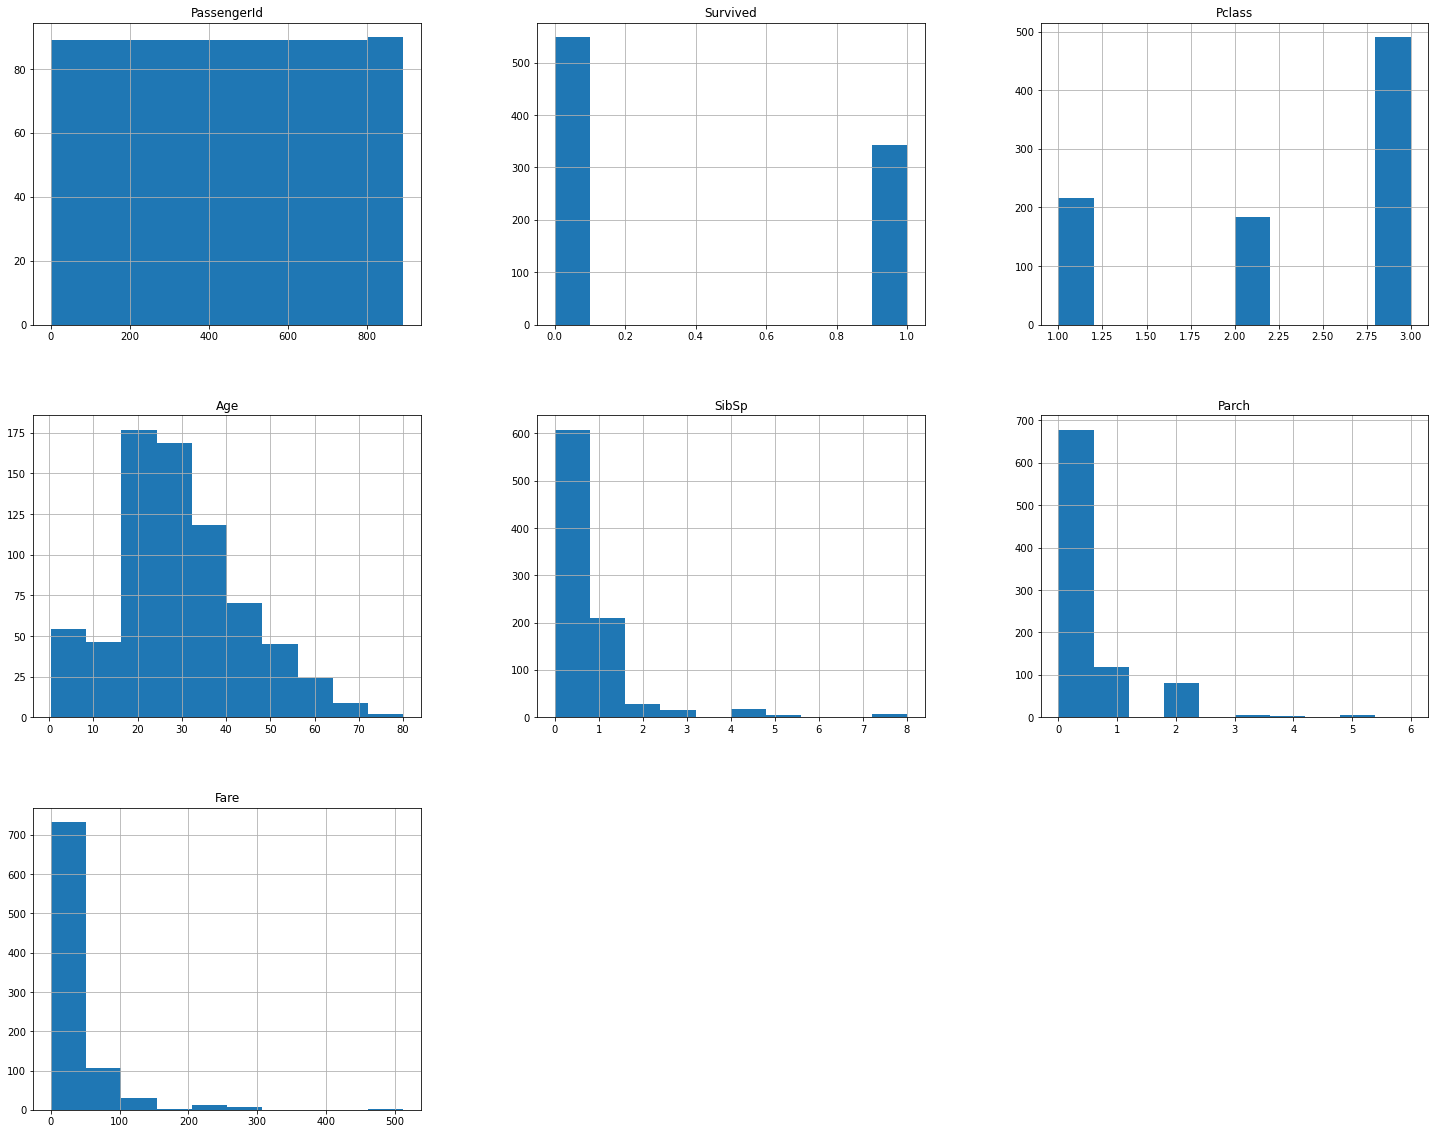

In [10]:
histogram=dt.select_dtypes(include=["float64", "int64"])
histogram.hist(figsize=(25,20))
plt.show()

In [11]:
# Most of the data are right skewed where as Pclass have left skew distribution

Text(0.5, 1.0, 'Survived Countplot')

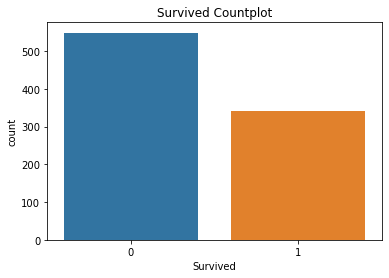

In [12]:
sns.countplot(new_dt["Survived"])
plt.title("Survived Countplot")

Text(0.5, 1.0, 'SibSp Countplot')

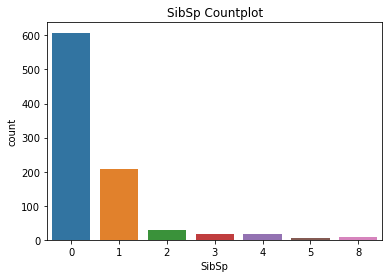

In [13]:
sns.countplot(new_dt["SibSp"])
plt.title("SibSp Countplot")

In [14]:
new_dt.shape

(891, 11)

In [15]:
new_dt.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Fill in all the missing values present in all the columns 

In [16]:
# Finding the null values
new_dt.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
# filling null values with mean of the age data
new_dt["Age"] = new_dt["Age"].fillna(new_dt["Age"].mean())
new_dt["Age"]


PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.699118
890    26.000000
891    32.000000
Name: Age, Length: 891, dtype: float64

In [18]:
# since there are many null values within the "Cabin" column of data we drop this from the data
new_dt = new_dt.drop(["Cabin"],axis=1)
new_dt

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [19]:
# Here the missing value is replaced by the mode in the "embarked" column of the data
new_dt["Embarked"] = new_dt["Embarked"].fillna(new_dt["Embarked"].mode()[0])
new_dt["Embarked"]

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

In [20]:
# Checking the null values after the correction 
new_dt.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## 5. Check and handle outliers in at least 3 columns in the dataset

### a) Column "Age"

Text(0.5, 1.0, 'Boxplot of Age')

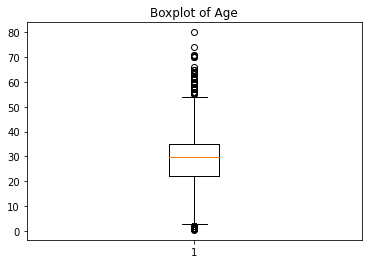

In [21]:
plt.boxplot(new_dt["Age"])
plt.title("Boxplot of Age")

In [22]:
Q1 = new_dt.Age.quantile(0.25)
Q3 = new_dt.Age.quantile(0.75)
Q1,Q3

(22.0, 35.0)

In [23]:
IQR=Q3-Q1
IQR

13.0

In [24]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
low_lim,up_lim


(2.5, 54.5)

In [25]:
outlier = []
for x in new_dt["Age"]:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)   

In [26]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [27]:
ind1=new_dt["Age"]>up_lim
new_dt.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [28]:
new_dt.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [29]:
new_dt

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


### b) Column "Fare"

Text(0.5, 1.0, 'Boxplot of Fare')

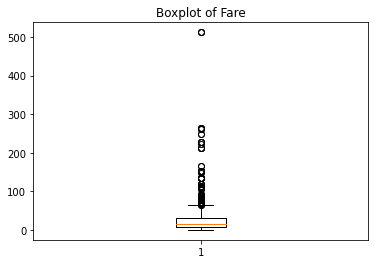

In [30]:
plt.boxplot(new_dt["Fare"])
plt.title("Boxplot of Fare")

In [31]:
Q1 = new_dt.Fare.quantile(0.25)
Q3 = new_dt.Fare.quantile(0.75)
Q1,Q3

(7.8958, 30.5)

In [32]:
IQR=Q3-Q1
IQR

22.6042

In [33]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
low_lim,up_lim

(-26.0105, 64.4063)

In [34]:
for x in new_dt["Fare"]:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [35]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0,
 71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86

In [36]:
ind2=new_dt["Fare"]>up_lim
fare = new_dt.loc[ind2].index 

In [37]:
print(*fare)

2 28 32 35 53 62 63 73 89 103 119 121 125 140 152 160 181 202 216 219 225 231 246 257 258 259 263 270 291 292 298 300 306 307 308 311 312 319 320 325 326 333 335 337 338 342 370 374 376 378 381 386 391 394 413 436 446 454 485 487 497 499 505 506 521 528 538 541 545 551 558 559 582 586 592 610 616 628 642 646 656 661 666 680 682 690 699 701 709 717 731 738 742 743 755 760 764 766 780 790 793 803 821 836 847 850 857 864


In [38]:
new_dt.drop([2, 28, 32, 35, 53, 62, 63, 73, 89, 103, 119, 121, 125, 140, 152, 160, 181, 202, 216, 219, 225, 231, 246, 257, 258, 259, 263, 270, 291, 292, 298, 300, 306, 307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 592, 610, 616, 628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 755, 760, 764, 766, 780, 790, 793, 803, 821, 836, 847, 850, 857, 864],inplace=True)

In [39]:
new_dt

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


### c) Column " SibSp"

Text(0.5, 1.0, 'Boxplot of SibSp')

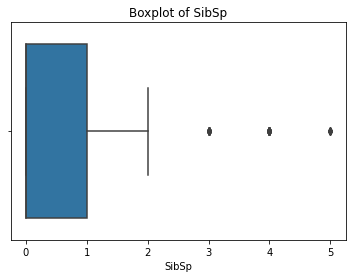

In [40]:
sns.boxplot(new_dt["SibSp"])
plt.title("Boxplot of SibSp")

In [41]:
Q1 = new_dt.SibSp.quantile(0.25)
Q3 = new_dt.SibSp.quantile(0.75)
Q1,Q3

(0.0, 1.0)

In [42]:
IQR=Q3-Q1
IQR

1.0

In [43]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
low_lim,up_lim

(-1.5, 2.5)

In [44]:
outlier = []
for x in new_dt["SibSp"]:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)   

In [45]:
outlier        

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [46]:
ind3=new_dt["SibSp"]>up_lim
new_dt.loc[ind3].index 


Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [47]:
new_dt.drop([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177, 183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788, 814, 820, 825, 851],inplace=True)

In [48]:
new_dt.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q


## 6. Do min max scaling on the feature set ("Survived" as target)

In [49]:
new_dt.shape

(705, 10)

In [50]:
new_dt.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [51]:
new_dt.Name.nunique

<bound method IndexOpsMixin.nunique of PassengerId
1                           Braund, Mr. Owen Harris
3                            Heikkinen, Miss. Laina
4      Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                          Allen, Mr. William Henry
6                                  Moran, Mr. James
                           ...                     
887                           Montvila, Rev. Juozas
888                    Graham, Miss. Margaret Edith
889        Johnston, Miss. Catherine Helen "Carrie"
890                           Behr, Mr. Karl Howell
891                             Dooley, Mr. Patrick
Name: Name, Length: 705, dtype: object>

In [52]:
new_dt.drop("Ticket",axis=1,inplace=True)

In [53]:
new_dt = pd.get_dummies(new_dt,columns=["Pclass","Sex","Embarked"])

In [54]:
new_dt.drop("Name",axis=1,inplace=True)

In [55]:
new_dt.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
3,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
6,0,29.699118,0,0,8.4583,0,0,1,0,1,0,1,0


In [56]:
y = new_dt["Survived"]
x = new_dt.drop("Survived",axis=1)

In [57]:
from sklearn.model_selection import train_test_split
# split the Dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [58]:
# perform linear regression
from sklearn import linear_model
lr= linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
#make prediction using the model
predictions=model.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE is" ,mean_squared_error(y_test,predictions))

MSE is 0.16788834484793608


In [60]:
rsquare= r2_score(y_test,predictions)
print("R2 value is",r2_score(y_test,predictions))

R2 value is 0.30111959131796595


In [61]:
x= new_dt.drop("Survived",axis=1)

In [62]:
x.describe()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,28.497462,0.283688,0.292199,16.779822,0.134752,0.238298,0.626950,0.314894,0.685106,0.156028,0.096454,0.747518
std,10.263420,0.512988,0.762963,13.139205,0.341701,0.426345,0.483958,0.464803,0.464803,0.363140,0.295422,0.434745
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.879200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.699118,0.000000,0.000000,11.133300,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,33.000000,1.000000,0.000000,24.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,54.000000,2.000000,6.000000,63.358300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [64]:
x= min_max.fit_transform(x)
x=pd.DataFrame(x)

In [65]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,705.000000,705.000000,705.00000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,0.524029,0.141844,0.04870,0.264840,0.134752,0.238298,0.626950,0.314894,0.685106,0.156028,0.096454,0.747518
std,0.191553,0.256494,0.12716,0.207379,0.341701,0.426345,0.483958,0.464803,0.464803,0.363140,0.295422,0.434745
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.402762,0.000000,0.00000,0.124359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.546456,0.000000,0.00000,0.175720,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.608063,0.500000,0.00000,0.378798,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
